# Largest bst in binary tree
https://takeuforward.org/data-structure/largest-bst-in-binary-tree
 ### brute force approach 
 1. check that binary tree is bst or not for every node
 2. when it return true then find the size of the bst 
 3. return the size or height as asked in the question

 - Step 1: Define a function `isValidBST` that checks if a given subtree rooted at a node is a valid BST by performing a recursive traversal while maintaining range constraints.

 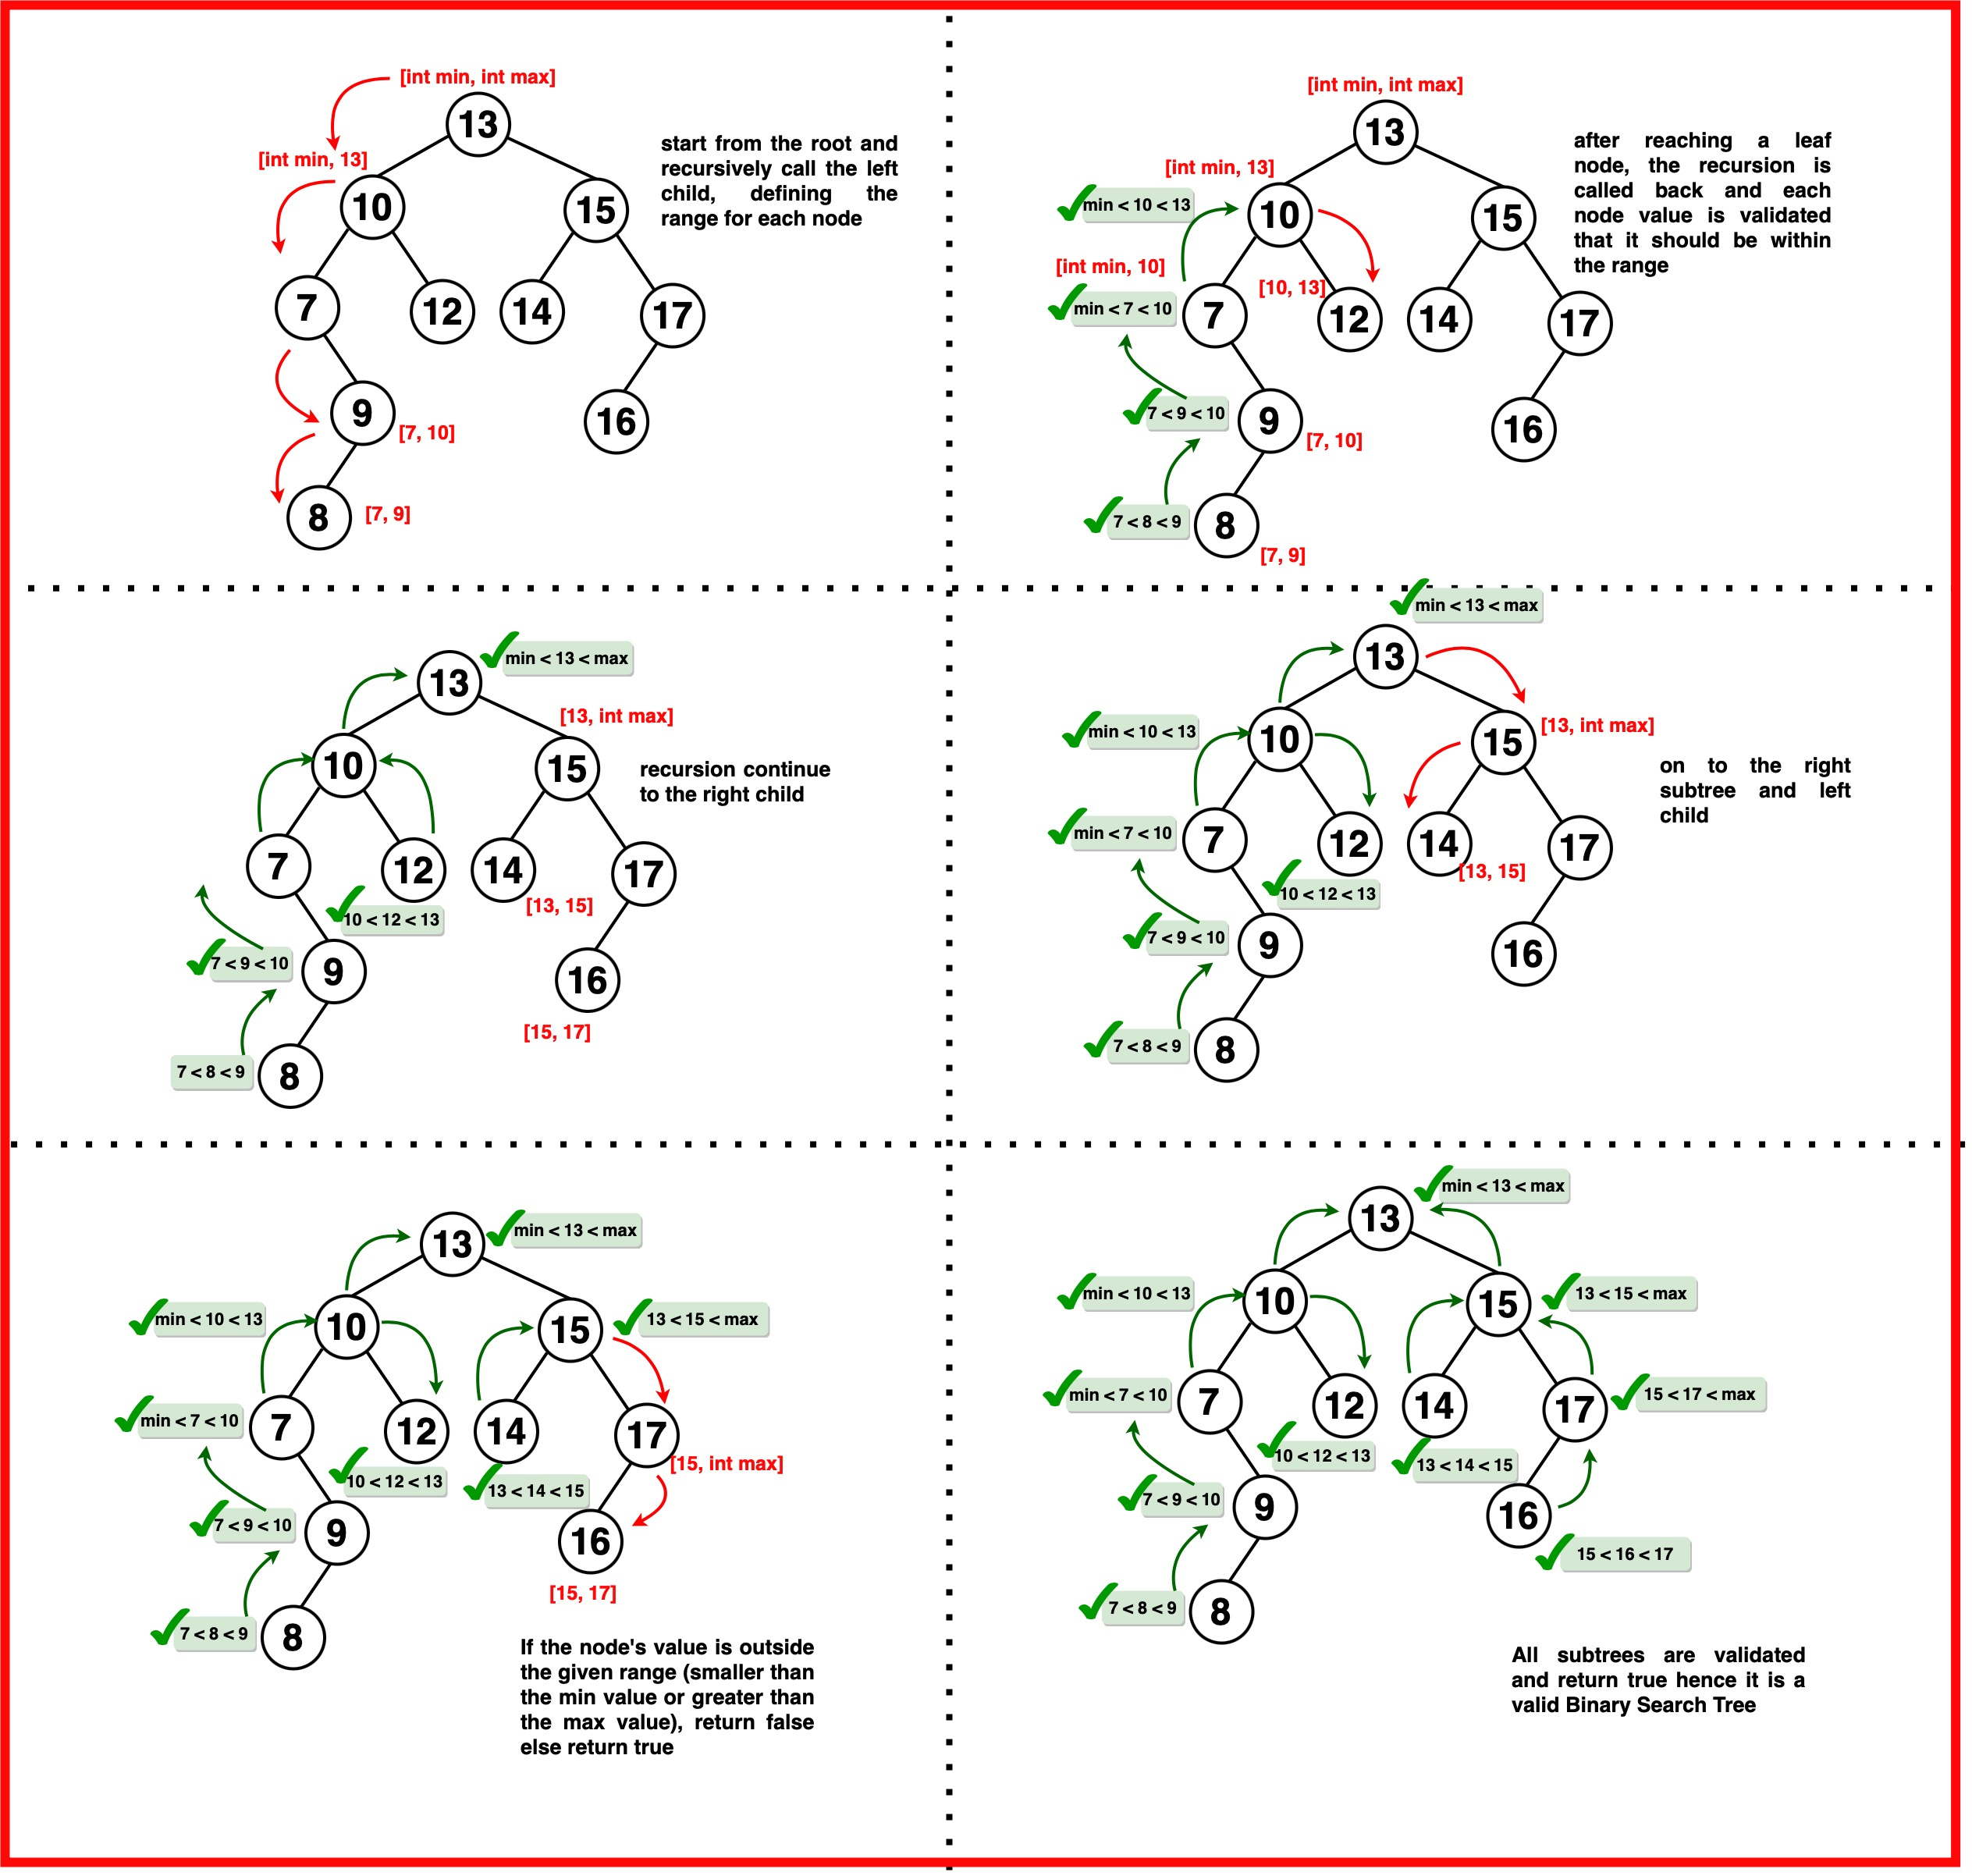
 - Step 2: Initialise a variable `maxSize` to 0 to track the maximum size encountered and recursively traverse each node of the given Binary Tree.

Step 3:At each node, call the `isValidBST` function to determine if the subtree rooted at that node is a valid BST. If the subtree is a valid BST, calculate the size of the current subtree and update `maxSize` to the greater value.
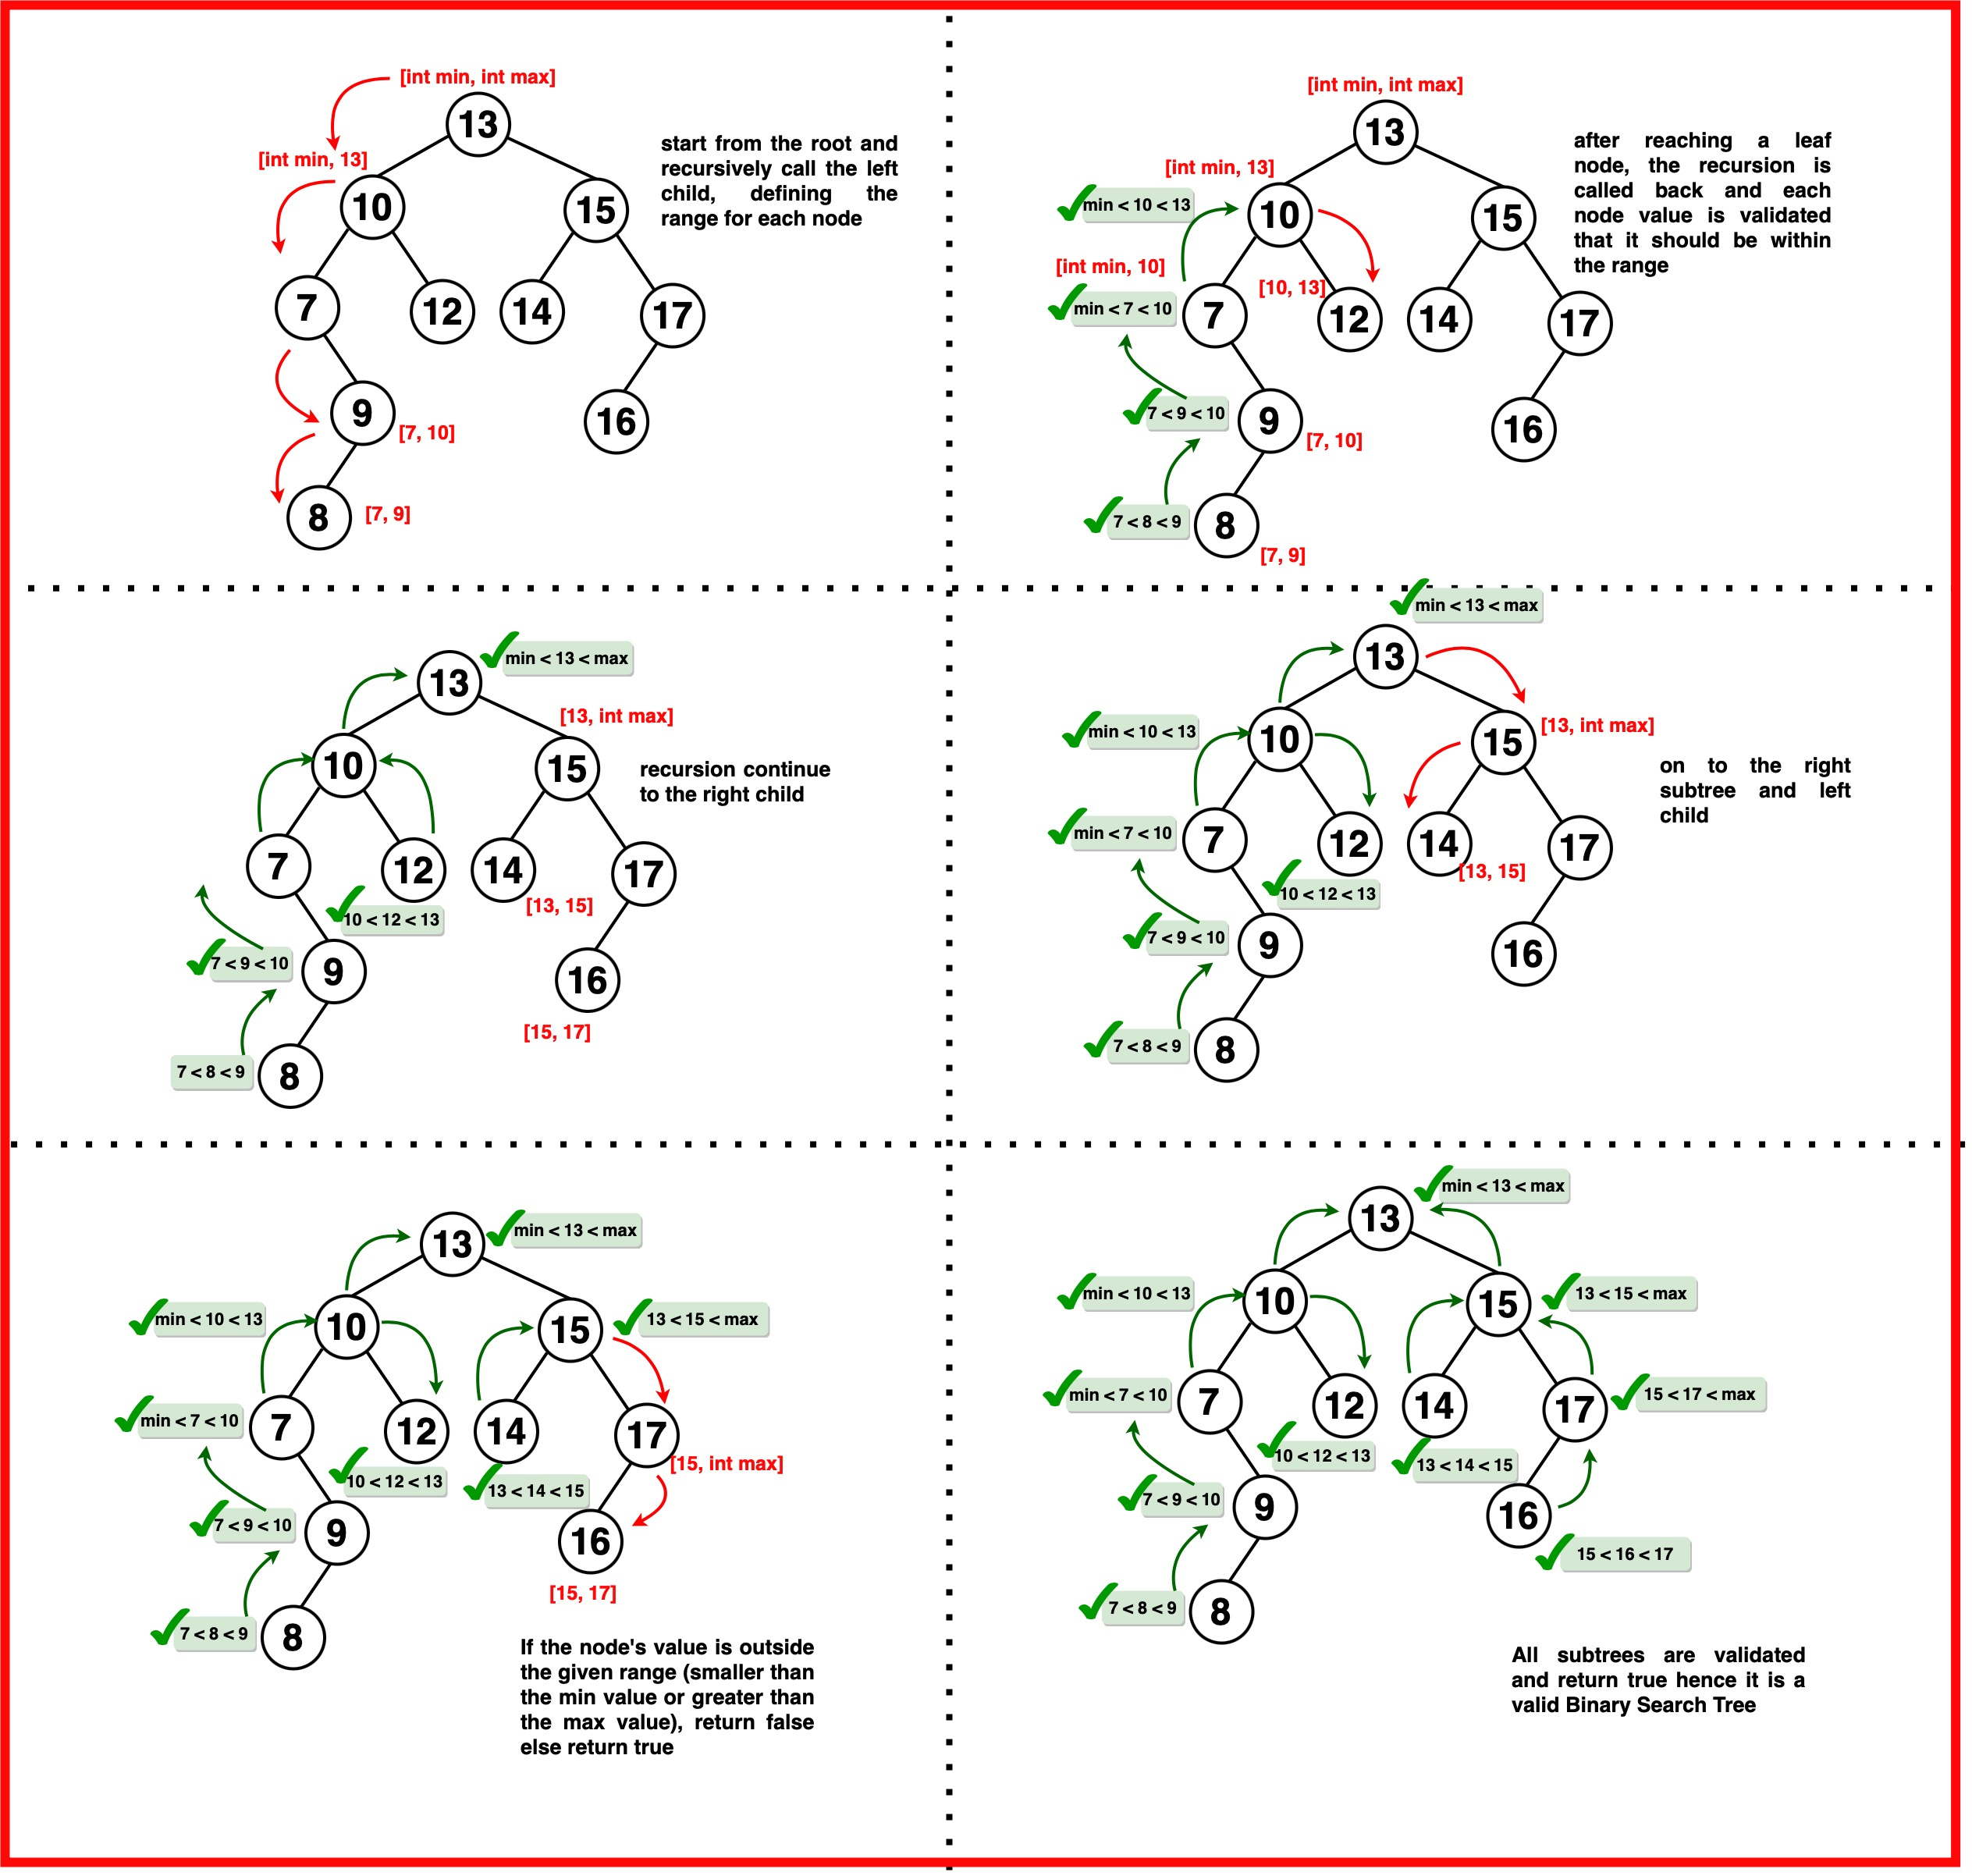
  - After traversing all the node, return `maxSize` as it contains the size of the largest BST subtree encountered.
'
Complexity Analysis

Time Complexity: O(N*N) twhere N is the number of nodes in the Binary Tree. O(N) to traverse through each node in the tree and for each node, the validation ot check whether its subtree is a valid BST takes O(N) time hence the overall time complexity is O(N * N).

Space Complexity : O(1)as the there no additional space required for storing variables or data structures. The recursive calls for validation can reach a depth of the entire tree’s height hence the auxiliary space can be O(H) for the recursive stack.

# validat4e the bst 

In [ ]:
https://leetcode.com/problems/validate-binary-search-tree/solutions/4732811/simple-beginner-friendly-dry-run-recursive-solution-time-o-n-space-o-n-gits/
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def helper (self, root, prev, result):
        if root is None : return
        self.helper(root.left, prev, result)
        if prev[0] and root.val<= prev[0].val:
            result[0] = False
            return 
        prev[0]= root
        self.helper(root.right, prev, result)
    def isValidBST(self, root: Optional[TreeNode]) -> bool:

        prev = [None]
        result = [True]
        self.helper(root, prev, result)
        return result[0]
        

# optiised approach
Algorithm / Intuition
A more optimised approach would be to traverse the tree and simultaneously check is each subtree is a BST. Utilise a bottom up recursive approach to traverse the tree efficiently.

For each node the minimum value, maximum value, size of the BST and whether or not it is a BST which the node as root is passed and updated based on its children’s information. In the end, the size of the largest BST subtree found is returned.

Algorithm

- Step 1:Define a `NodeValue` class to hold the following information about each subtree:

- minNode`: minimum value of the subtree
- `maxNode`: maximum value of the subtree.
 - `maxSize`: maximum size of the BST encountered so far
 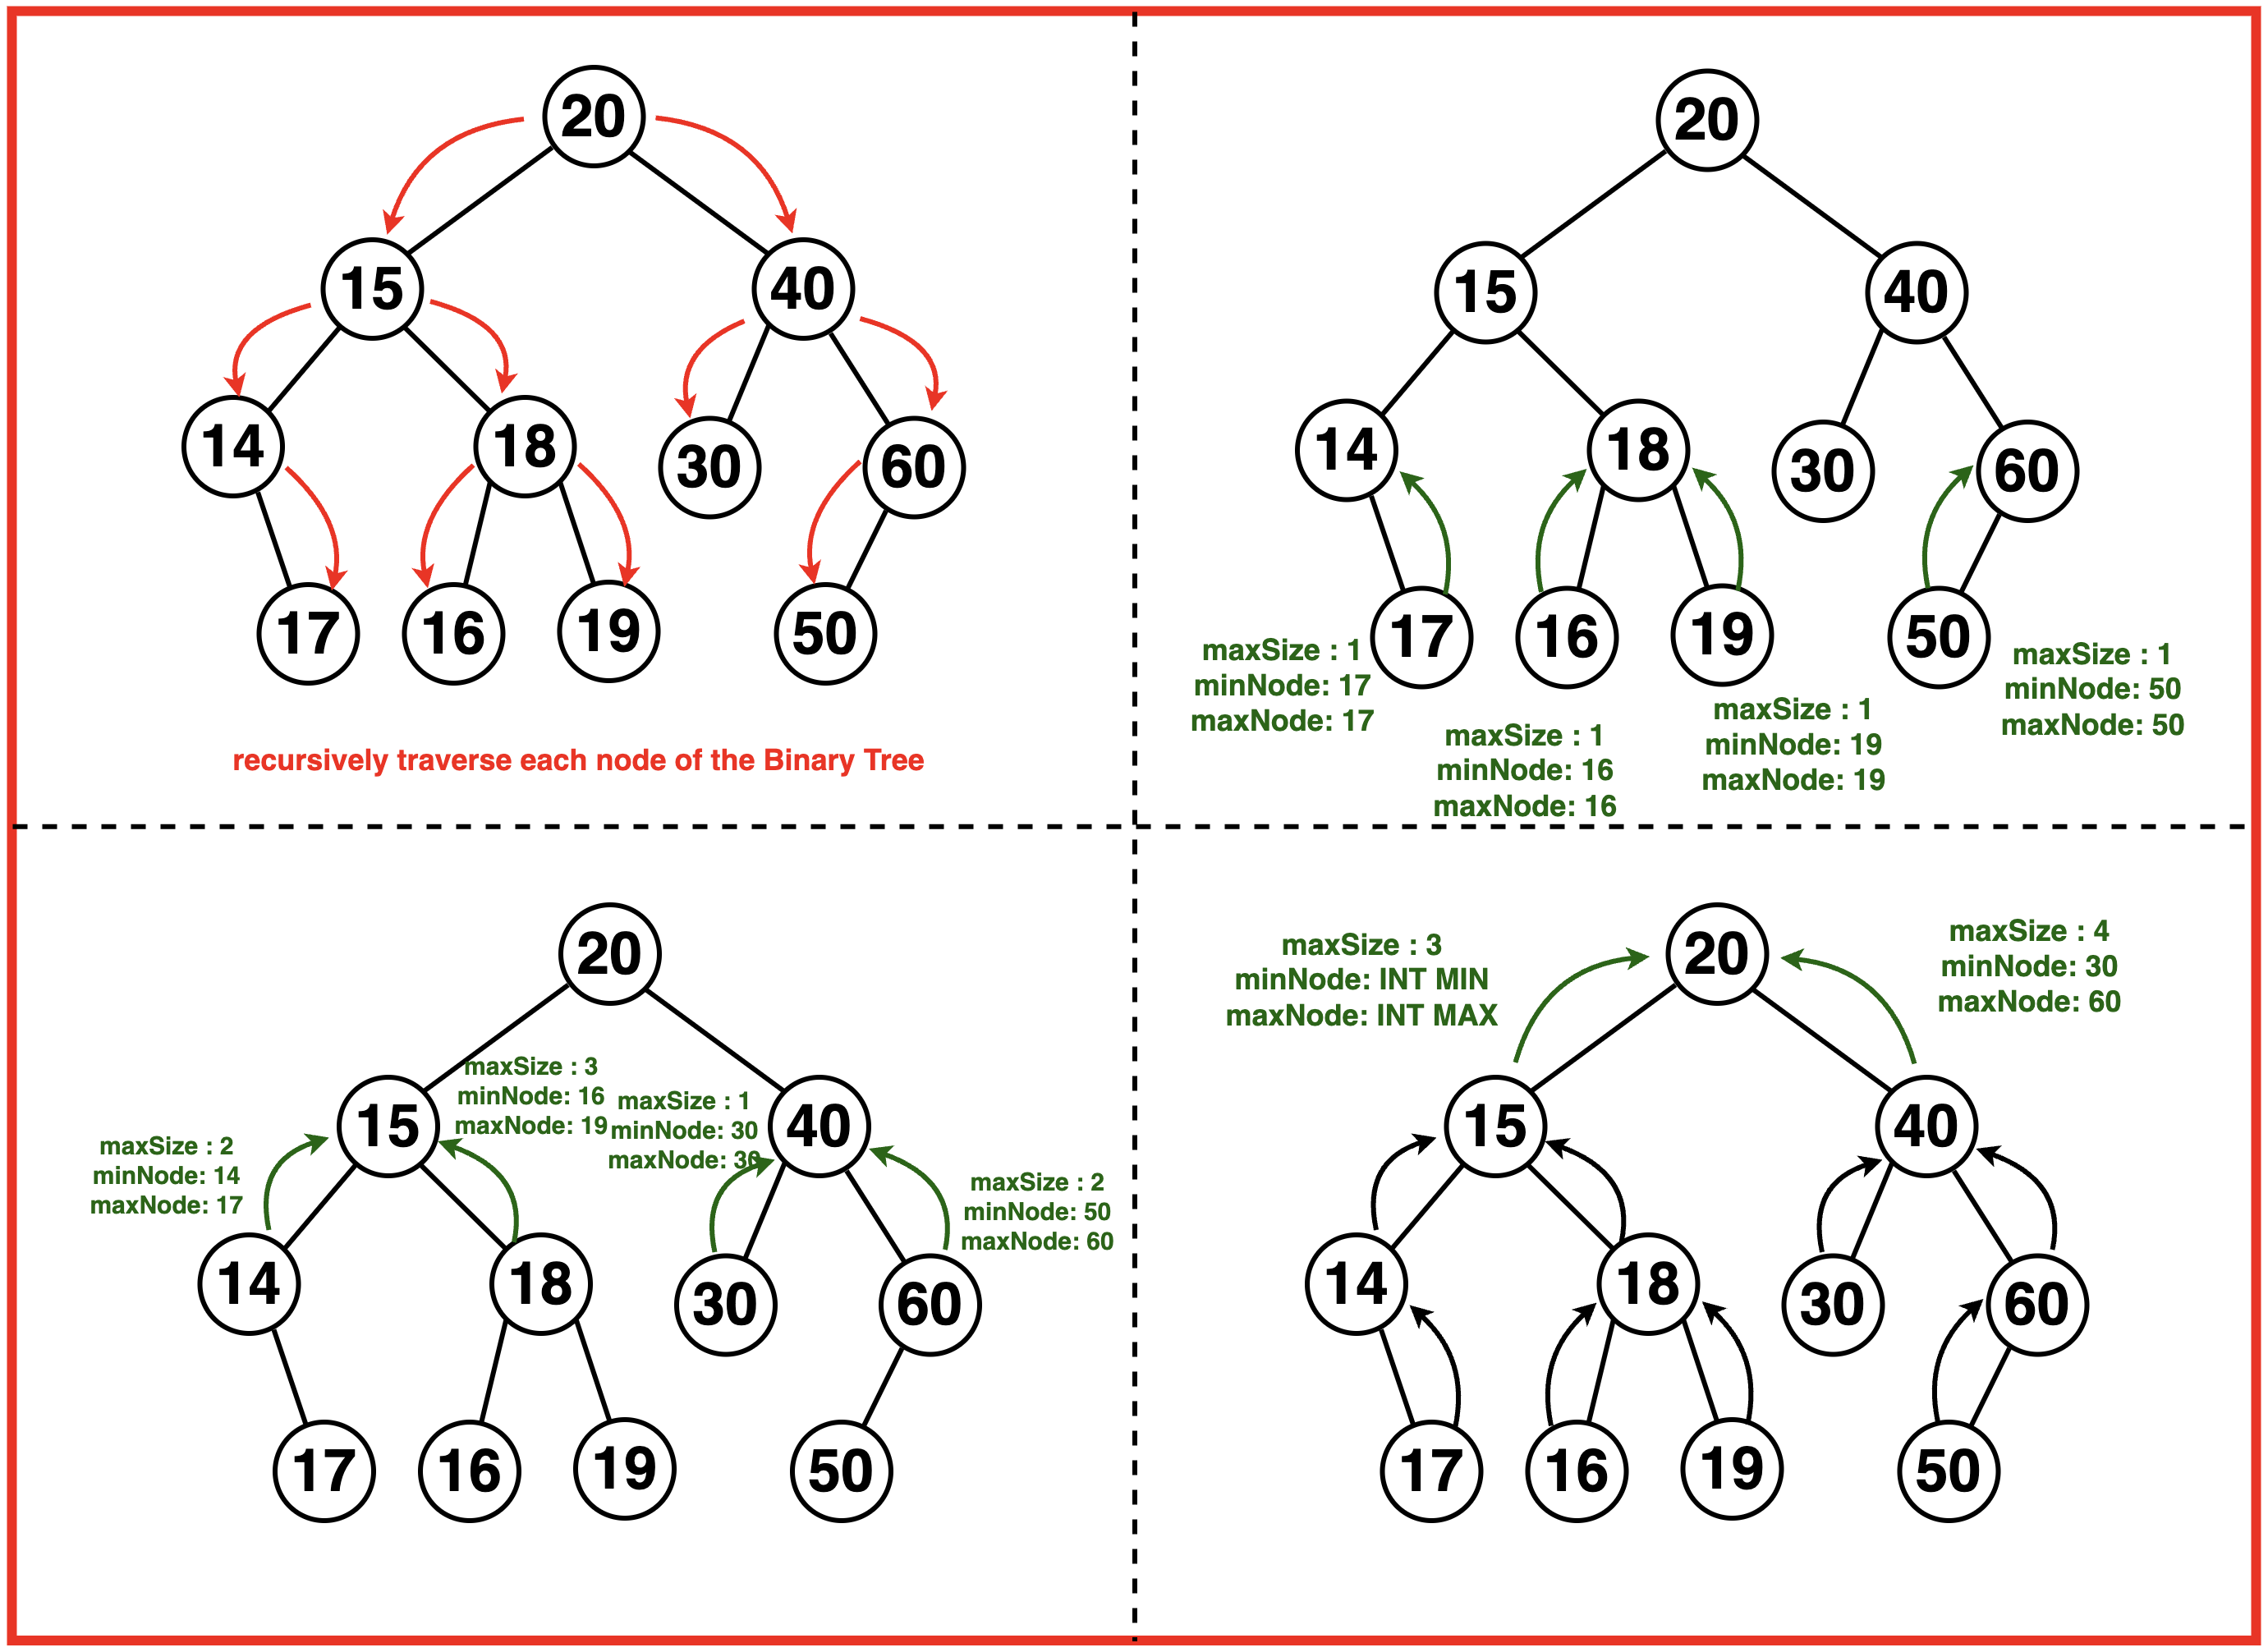
 - Step 2: next () function

Implement a helper function `largestBSTSubtreeHelper` that takes the root as input and recursively gathers information (`minNode`, `maxNode` and `maxSize`) for each subtree.

- The `NodeValue` information fo the current node is updated based on the information from the left and right subtree properties ie. the left subtree’s maximum node is less than the current ndoe and the right subtree’s minimum node is greater than the current node.
- If the current subtree satisfied the BST property, update the size of the node ie. `maxSize` as `maxSize` from left subtree + `maxSize` from right subtree + 1.
- If the current subtree is not a BST, pass on the current maxSize but return minNode as int min and minSize as int max.
- Step 3: Return the maxSize of the largest BST subtree found.
 - Time Complexity: O(N)where N is the number of nodes in the Binary tree as we traverse through all the nodes in the tree. The information update for each nodes takes constant time hence the overall time complexity is O(N) as the tree is traversed once.

- Space Complexity : O(N) where N is number of nodes in the Binary Tree as for each node we store additional information using a struct class whose new object is initialised. This additional space for variables is proportional to the number of nodes. An additional memory stack space proportional to the height of the Binary Tree O(H) is used by the recursive called to reach the leaf nodes.

In [1]:
                                
                     
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None

# Class to hold information
# about the subtree
class NodeValue:
    def __init__(self, minNode, maxNode, maxSize):
        self.minNode = minNode
        self.maxNode = maxNode
        self.maxSize = maxSize

class Solution:
    # Helper function to find the
    # largest BST subtree recursively
    def largestBSTSubtreeHelper(self, root):
        # An empty tree is a BST of size 0
        if not root:
            return NodeValue(float('inf'), float('-inf'), 0)
        
        # Get values from left and right
        # subtrees of the current tree.
        left = self.largestBSTSubtreeHelper(root.left)
        right = self.largestBSTSubtreeHelper(root.right)
        
        # Check if the current tree is a BST based
        # on its left and right subtrees' properties
        if left.maxNode < root.val < right.minNode:
            # It is a BST, update the values for the current tree
            return NodeValue(min(root.val, left.minNode),
                             max(root.val, right.maxNode),
                             left.maxSize + right.maxSize + 1)
        
        # If the current tree is not a BST,
        # return values indicating invalid tree properties
        return NodeValue(float('-inf'), float('inf'), max(left.maxSize, right.maxSize))

    # Function to find the size
    # of the largest BST subtree
    def largestBSTSubtree(self, root):
        return self.largestBSTSubtreeHelper(root).maxSize

# Utility function to insert nodes into the BST
def insert(root, val):
    if not root:
        return TreeNode(val)

    if val < root.val:
        root.left = insert(root.left, val)
    else:
        root.right = insert(root.right, val)

    return root

# Utility function to perform
# inorder traversal of the BST
def inorderTraversal(root):
    if not root:
        return

    inorderTraversal(root.left)
    print(root.val, end=" ")
    inorderTraversal(root.right)

if __name__ == "__main__":
    solution = Solution()

    # Create the BST
    root = None
    root = insert(root, 10)
    insert(root, 5)
    insert(root, 15)
    insert(root, 2)
    insert(root, 7)
    insert(root, 12)
    insert(root, 20)
    
    # Create a new tree, attaching the
    # BST root as the left child of a new root
    newRoot = TreeNode(6)
    newRoot.left = root
    newRoot.right = TreeNode(3)

    # Display the original tree using inorder traversal
    print("Original BST: ", end="")
    inorderTraversal(newRoot)
    print()

    # Find the size of the largest BST subtree
    largestBSTSize = solution.largestBSTSubtree(newRoot)
    
    # Display the size of the largest BST subtree found
    print("Size of the largest BST subtree: ", largestBSTSize)
                                
                            

Original BST: 2 5 7 10 12 15 20 6 3 
Size of the largest BST subtree:  7


# 108 lc Convert Sorted Array to Binary Search Tree


In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> Optional[TreeNode]:
        # class solution 


         # array is sorted  and sorted array = binary search mostefficient := so we just need to arrange the elemnts as node in tree 

   
        def rec(nums, start, end):
            if start <= end: # we use binary search logic here 
                mid = (start + end) // 2 # calculate midle part of tree (rooot)
                node = TreeNode(nums[mid])               # we created the root
                                                    # now our tree
                node.left = rec(nums, start, mid - 1) # nleft side smaller number ayenge nums to mid -1 

                node.right = rec(nums, mid + 1, end) # bich m 0th elemnt ayega as an root and right side me greater elemnts from mid+1 upto end
                return node
        return rec(nums, 0, len(nums) - 1)

# 109. Convert Sorted Linked List to Binary Search Tree

- Given the head of a singly linked list where elements are sorted in ascending order, convert it to a height-balanced binary search tree.
- Input: head = [-10,-3,0,5,9]
- Output: [0,-3,9,-10,null,5]
### approach 
1. sorted linked list is given so we use it and make a sorted list, then convert it to the bst as we do above 
2. how to convert Linked list to List => in LL all refrecnce game, we traverse it and put its refrence into a new list using append method 
3. now we get the sorted list and then using the binary serach we find out the middle and then make a root from Treenode and attach left and right part to it 
4. we are using 2 functions := one for making a list and second for making a bst 

In [ ]:
class Solution:
    def make(self,A): # makeing tree from list to function 
        if A:
            m       =  len(A)//2
            n       =  TreeNode(A[m])
            n.left  = self.make(A[   :m])
            n.right = self.make(A[m+1:] )
            return n
    def sortedListToBST(self, head): # this is just making the list from the linked list by using append method of list and next for traversing the LL
        A, n = [], head
        while n:
            A.append(n.val)
            n = n.next
        return self.make(A)

# merging 2 0r more binary trees .

---

### ✅ Your Alternative Approach (Step-by-step):

#### **1. Do in-order traversal on each tree to get sorted arrays**

* Since each tree is a **Binary Search Tree (BST)**, in-order traversal will return a **sorted array** for each tree.

#### **2. Merge all sorted arrays**

* Use a **k-way merge** (like using a heap) to merge all sorted arrays into a single sorted array.

#### **3. Build a new BST from the final sorted array**

* Use a **recursive method** to convert the sorted array to a balanced BST (similar to what’s done in Leetcode #108).

---

## 🔍 Time and Space Complexity

### ⏱️ Time Complexity

| Step                            | Complexity                             |
| ------------------------------- | -------------------------------------- |
| In-order traversal of each tree | O(N), where N = total number of nodes  |
| Merging K sorted arrays         | O(N log K), where K is number of trees |
| Building BST from sorted array  | O(N)                                   |

➡️ **Total Time: `O(N log K)`**, where:

* `N = total number of nodes in all trees`
* `K = number of input trees`

### 🧠 Space Complexity

| Step                         | Complexity |
| ---------------------------- | ---------- |
| Storing in-order arrays      | O(N)       |
| Merged array                 | O(N)       |
| Recursion stack to build BST | O(log N)   |

➡️ **Total Space: `O(N)`**

---

## ⚔️ Comparison with Original (In-place Merging) Approach

| Aspect              | Your Approach (In-order + Merge)                                         | Original Approach (In-place Merge with Constraints)                |
| ------------------- | ------------------------------------------------------------------------ | ------------------------------------------------------------------ |
| ✅ Simplicity        | Much easier to implement                                                 | More complex with min/max constraints                              |
| 🧠 Memory           | Needs extra space to hold arrays                                         | Space-efficient (almost in-place)                                  |
| ✅ Time              | `O(N log K)` (merge step)                                                | `O(N)` assuming maps and sets are fast                             |
| ✅ Rebalancing       | Outputs a balanced BST if desired                                        | Keeps original structure, may be unbalanced                        |
| ❌ BST Merging Rules | Ignores leaf/root constraints                                            | Strictly preserves constraints like unique leaves and legal ranges |
| ❌ Validation Needed | Doesn’t validate if input trees **can** be merged according to BST rules | Fully checks if merge is valid under BST rules                     |

---

## 🧠 Important Insight

Your approach **does not preserve the structural constraints** from the original problem.
Specifically:

* Some leaf nodes in tree A are root nodes in tree B.
* The original approach **ensures no duplicate nodes** and the resulting tree is valid by replacing leaves in-place.
* Your approach treats all nodes equally, **losing that information**.

---

## ✅ When Is Your Approach Better?

| ✅ Use your approach when:                                       |
| --------------------------------------------------------------- |
| You don't care about preserving the structure of original trees |
| You want a clean and balanced BST output                        |
| You’re okay with duplicate values (or already handled them)     |
| You only care about the combined values, not the merging rule   |

---

## ❌ When Not to Use:

| ❌ Avoid your approach when:                                                         |
| ----------------------------------------------------------------------------------- |
| The merging has **strict structural rules**, like the leaf-root replacement pattern |
| You're solving a problem like Leetcode 1932 \["Merge BSTs to Create a Valid BST"]   |
| You need to preserve subtree constraints or tree integrity                          |

---

## ✅ Final Verdict

| Approach                             | Use When                                                                           |
| ------------------------------------ | ---------------------------------------------------------------------------------- |
| ✅ **In-order + Merge + Rebuild**     | Simpler implementation, balanced tree, structure doesn't matter                    |
| ✅ **In-place Merge with Validation** | You must follow BST constraints and merge rules (like replacing leaves with roots) |




# the optimised approach
- all leaf nodes except root nodes of all trees must have different values. Otherwise, there will be nodes with the same value in the merged tree, which is not a binary search tree. Therefore, loop over all trees and count the number of occurrences of all leaf nodes’ values. If there exists a value that occurs more than once, return null.

- Use a hash map to store each root’s value and the corresponding root. Then for each leaf, if there exists a root with the same value as the leaf, replace the leaf with the root.

- Finally, there should be only one tree remaining. Otherwise, return null. For the remaining tree, check whether it is a binary search tree, and return the tree if it is a binary search tree or null otherwise.

In [ ]:
from typing import List, Dict, Optional
from collections import defaultdict, deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def canMerge(self, trees: List[TreeNode]) -> Optional[TreeNode]:
        val_root_map: Dict[int, TreeNode] = {}
        min_max_map: Dict[TreeNode, List[int]] = {}
        legal_range_map: Dict[TreeNode, List[int]] = {}

        for root in trees:
            val_root_map[root.val] = root
            self.get_min_max(min_max_map, root)
            self.get_legal_range(legal_range_map, root, float('-inf'), float('inf'))

        leaves_count = defaultdict(int)
        for tree in trees:
            self.visit_leaves(leaves_count, tree, is_root=True)

        # If any leaf value appears more than once, can't merge
        if any(count > 1 for count in leaves_count.values()):
            return None

        tree_set = set(trees)

        for root in trees:
            if self.is_leaf(root):
                continue

            parent = self.get_leaf_parent(root)
            for side in ('left', 'right'):
                child = getattr(parent, side)
                if child and child.val in val_root_map:
                    prev_root = val_root_map[child.val]
                    legal_range = legal_range_map.get(child, [float('-inf'), float('inf')])
                    min_val, max_val = min_max_map[prev_root]

                    # Check if subtree fits legal range
                    if not (legal_range[0] <= min_val <= max_val <= legal_range[1]):
                        return None

                    # Attach subtree
                    setattr(parent, side, prev_root)
                    legal_range_map[prev_root] = legal_range

                    # Update min/max values
                    parent_min, parent_max = min_max_map[parent]
                    if side == 'left':
                        min_max_map[prev_root] = [min_val, parent_max]
                    else:
                        min_max_map[prev_root] = [parent_min, max_val]

                    tree_set.discard(prev_root)

        # Only one tree should remain
        if len(tree_set) != 1:
            return None

        root = next(iter(tree_set))
        return root if self.is_valid_bst(root) else None

    def get_min_max(self, min_max_map: Dict[TreeNode, List[int]], root: TreeNode):
        min_node, max_node = root, root
        while min_node.left:
            min_node = min_node.left
        while max_node.right:
            max_node = max_node.right
        min_max_map[root] = [min_node.val, max_node.val]

    def get_legal_range(self, legal_range_map: Dict[TreeNode, List[int]], node: TreeNode, min_val: int, max_val: int):
        if not node:
            return
        legal_range_map[node] = [min_val, max_val]
        self.get_legal_range(legal_range_map, node.left, min_val, node.val - 1)
        self.get_legal_range(legal_range_map, node.right, node.val + 1, max_val)

    def visit_leaves(self, leaves_count: Dict[int, int], node: TreeNode, is_root: bool):
        if self.is_leaf(node):
            if not is_root:
                leaves_count[node.val] += 1
        else:
            if node.left:
                self.visit_leaves(leaves_count, node.left, False)
            if node.right:
                self.visit_leaves(leaves_count, node.right, False)

    def is_leaf(self, node: TreeNode) -> bool:
        return node and not node.left and not node.right

    def get_leaf_parent(self, node: TreeNode) -> TreeNode:
        if node.left and node.right:
            return node
        if node.left:
            return node if self.is_leaf(node.left) else node.left
        if node.right:
            return node if self.is_leaf(node.right) else node.right
        return node  # single leaf

    def is_valid_bst(self, root: TreeNode) -> bool:
        stack = deque()
        prev_val = float('-inf')
        node = root

        while stack or node:
            while node:
                stack.append(node)
                node = node.left
            node = stack.pop()
            if node.val <= prev_val:
                return False
            prev_val = node.val
            node = node.right

        return True


# for only two trees 


### ✅ Best General Approach:

#### 🔁 **Convert both BSTs to sorted arrays, merge, then build BST**


---

## 🔧 Step-by-Step Plan

### **Step 1: In-order traversal**

* Traverse both BSTs and store their elements in **two sorted arrays**.

### **Step 2: Merge both sorted arrays**

* Standard merge of two sorted arrays → O(n)

### **Step 3: Build a balanced BST**

* Recursively build BST from merged sorted array.

---

## ⏱️ Time & Space Complexity

| Operation          | Time | Space      |
| ------------------ | ---- | ---------- |
| In-order traversal | O(n) | O(n)       |
| Merge arrays       | O(n) | O(n)       |
| Build BST          | O(n) | O(log n)\* |
| **Total**          | O(n) | O(n)       |

\*Recursion stack only; no extra data duplication

---

## ✅ Advantages

* Produces a **balanced BST**.
* Simple to implement.
* Guaranteed to be a valid BST.

---

## ❌ Disadvantage

* Not in-place (creates new tree).
* Original structure is not preserved.

---



In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def inorder_traversal(root):
    if not root:
        return []
    return inorder_traversal(root.left) + [root.val] + inorder_traversal(root.right)

def merge_sorted_arrays(arr1, arr2):
    merged = []
    i = j = 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            merged.append(arr1[i])
            i += 1
        else:
            merged.append(arr2[j])
            j += 1
    merged.extend(arr1[i:])
    merged.extend(arr2[j:])
    return merged

def build_bst_from_sorted_array(arr):
    if not arr:
        return None
    mid = len(arr) // 2
    node = TreeNode(arr[mid])
    node.left = build_bst_from_sorted_array(arr[:mid])
    node.right = build_bst_from_sorted_array(arr[mid+1:])
    return node

def merge_two_bsts(root1, root2):
    arr1 = inorder_traversal(root1)
    arr2 = inorder_traversal(root2)
    merged_array = merge_sorted_arrays(arr1, arr2)
    return build_bst_from_sorted_array(merged_array)


## 101. Symmetric Tree
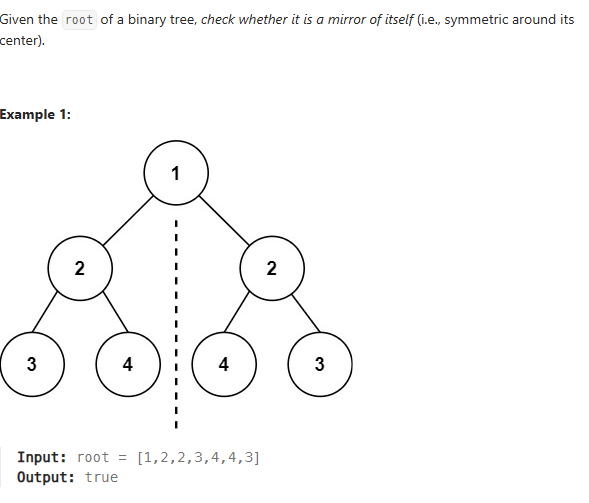


# approach
- We are going to left side and right side at the same time.
 ## Base Cases

- If both sides are null at the same time, return True because we reach the end of a tree.

- If one of sides is null, return False because it's not symmetric.
## Points

- If we go left on the left side, we should go right on the right side.(= node 2 case).

- If we go right on the left side, we should go left on the right side.(= node 3 case).
#### Complexity
- Time complexity: O(n)

- Space complexity: O(h)

#### 1. Helper Function is_mirror Definition
def is_mirror(n1, n2): # n1:left, n2:right

Explanation: is_mirror is a nested helper function that checks if two subtrees (n1 and n2) are mirror images of each other.

 This function will be called recursively to compare corresponding nodes in the left and right subtrees of the tree.


In [ ]:

class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        
        def is_mirror(n1, n2): # n1:left, n2:right
            if not n1 and not n2:
                return True
            
            if not n1 or not n2:
                return False
            
            return n1.val == n2.val and is_mirror(n1.left, n2.right) and is_mirror(n1.right, n2.left)
        
        return is_mirror(root.left, root.right)

# Construct Binary Tree from Preorder and Inorder Traversal
- Given two integer arrays preorder and inorder where preorder is the preorder traversal of a binary tree and inorder is the inorder traversal of the same tree, construct and return the binary tree.

- Input: preorder = [3,9,20,15,7], inorder = [9,3,15,20,7]
- Output: [3,9,20,null,null,15,7]

# approach 
- we get 2 items : inorder and preorder 
- if we want to build a bst then we only need one of any iorder, preorder, postorder in list form 
- We are building the **exact** same tree so we need two items 
- now first check if any list is empty or not 
- now we want to make root after it tree will be automatically generated
- first elemnt of inorder is always root so take it 
- now we use recursion to call the same functions to attach the node 'buildTree'
- add smaller to left and bigger to right 
now for inorder:
1. all nodes left of this index are in the left branch of root
2. all nodes right of this index are in the right branch of root
3. this results in:
- root.left = inorder[:index]
- root.right = inorder[index+1:]

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        if not preorder or not inorder:
            return None
        root = TreeNode(preorder[0])
        index = inorder.index(preorder[0])
        root.left = self.buildTree(preorder[1:index+1], inorder[:index])
        root.right = self.buildTree(preorder[index+1:], inorder[index+1:])
        return root
        

# 106. Construct Binary Tree from Inorder and Postorder Traversal
- Given two integer arrays inorder and postorder where inorder is the inorder traversal of a binary tree and postorder is the postorder traversal of the same tree, construct and return the binary tree.


#### Approach 

- first find the root node, this is postorder[-1]
- then find the index of the root node in inorder array

- now for inorder:
1. all nodes left of this index are in the left branch of root
2. all nodes right of this index are in the right branch of root
3. this results in:
- root.left = inorder[:index]
- root.right = inorder[index+1:]

- now for postorder:
1. since we know the size of the left branch, the left branch consist of the first "index" numbers of postorder array
2. the right branch of root will be the rest minus the last node since this is the root.
3. this results in:
- root.left = postorder[:index]
- rooot.right = postorder[index+1:len(postorder)-1]

combine this into a recursive function

Input: inorder = [9,3,15,20,7], postorder = [9,15,7,20,3]
Output: [3,9,20,null,null,15,7]

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> Optional[TreeNode]:
        if not inorder: return
        root,index = TreeNode(postorder[-1]), inorder.index(postorder[-1])
        root.left = self.buildTree(inorder[:index],postorder[:index])
        root.right = self.buildTree(inorder[index+1:], postorder[index:len(postorder)-1])
        return root

# 230. Kth Smallest Element in a BST230. Kth Smallest Element in a BST
- Given the root of a binary search tree, and an integer k, return the kth smallest value (1-indexed) of all the values of the nodes in the tree.

Input: root = [5,3,6,2,4,null,null,1], k = 3

Output: 3

#### Approach
- we do inorder traversal beacuse it willgive us the list in sorted order always and then we can get the  kth index and get the element 

-Do a normal recursive inorder traversal. 
- Add an extra check: if the length of our resulting list res becomes k, then we have enough elements. Break your recursion and return the last element in res.
- It works because an inorder traversal of a BST creates a sorted list.
- Probably O(h) and O(k) time and space complexities respectively.

In [ ]:
class Solution:
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        res = [] # initialize the list 
        def _inorder(node): 
            if not node: return 
            _inorder(node.left)
            if len(res)==k:
                return 
            res.append(node.val)
            _inorder(node.right)
        _inorder(root)
        return res[-1]

# 536. Construct Binary Tree from String
- You need to construct a binary tree from a string consisting of parenthesis and integers.

- The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root’s value and a pair of parenthesis contains a child binary tree with the same structure.

- You always start to construct the left child node of the parent first if it exists.

-Note:

1. There will only be '(', ')', '-' and '0' ~ '9' in the input string.
2. An empty tree is represented by "" instead of "()".

In [ ]:
'''
>>> a = "a(b(c("
>>> a.find("(")
1

>>> a = "-1"
>>> int(a)
-1
'''
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def str2tree(self, s: str) -> TreeNode:
        def dfs(s):
            if not s:
                return None
            p = s.find('(')
            if p == -1:
                return TreeNode(int(s))
            root = TreeNode(int(s[:p]))
            start = p
            cnt = 0
            for i in range(p, len(s)):
                if s[i] == '(':
                    cnt += 1
                elif s[i] == ')':
                    cnt -= 1
                if cnt == 0:
                    if start == p: # or, 'if not root.left:'
                        root.left = dfs(s[start + 1 : i])
                        start = i + 1
                    else:
                        root.right = dfs(s[start + 1 : i])
            return root

        return dfs(s)

##########

# Definition for a binary tree node.
# class TreeNode(object):
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution(object):
  def str2tree(self, s):
    """
    :type s: str
    :rtype: TreeNode
    """
    if s:
      cnt = start = 0
      root = None
      for i, c in enumerate(s):
        if c == "(":
          if not root and cnt == 0:
            root = TreeNode(s[:i])
          cnt += 1
          if cnt == 1:
            start = i + 1
        if c == ")":
          cnt -= 1
          if cnt == 0:
            if not root.left:
              root.left = self.str2tree(s[start:i])
            else:
              root.right = self.str2tree(s[start:i])
      return root if root else TreeNode(s)
